In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

from datetime import datetime
from config import weather_api_key

In [2]:
# create random latitudes & longitudes

latitudes = np.random.uniform(-90.0, 90.0, size=1500)

longitudes = np.random.uniform(-180.0, 180.0, size=1500)

# combine the latitudes & longitudes

coords = zip(latitudes, longitudes)

coords

In [3]:
coordinates = list(coords)

In [4]:
# print to make sure it is correctly unzipped into list

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

74.53975860736602 -65.03200543805207
-18.627410880598674 -127.18112805051837
36.24848436241511 141.28647327156858
46.83004433868231 -77.49099029522245
28.391215645261994 -110.70933069222534
-0.062147581047170775 -161.18252891615546
-31.991278370975117 -34.051234338203585
-34.65275092678093 -14.542087056817365
-16.780703055706454 -150.62285049739083
-85.5320566672025 -158.667539138341
-47.405565817758315 -152.1006541076571
-71.54996203982566 -60.11073053175332
-37.16492551981182 11.944238375244936
41.92369472912958 -53.899268325293974
-15.311025154188059 -52.847105783357804
64.22853923799357 93.33446563380551
19.8671034626624 -14.99007526610859
-51.310400787162926 33.57327755010266
-54.13292201832161 62.720762007140564
37.876475076176604 73.8704794908779
-59.889687101125574 79.66331456829931
54.61352341357676 -15.325178088691672
70.52770527012163 69.62096440467641
66.61472382489458 -173.21894726865074
45.7447875292477 143.8387247619175
-81.06016096217294 -119.14363741603788
-89.03318601

45.117598493572956 177.14062322972632
79.79883654428943 43.814571076922846
4.148601245771545 -179.98384514496746
-84.3687541948216 -0.9706422600775682
-60.53730809292723 41.835675784270904
-28.64419402113038 -24.174953542122466
-17.6204229849062 -115.3426377356795
47.092758330864285 37.804238688790605
-32.249212204512304 -171.98539300316477
-52.28255716409972 -69.53463631243544
-31.47171506666198 -15.227539661468455
75.5354892655917 74.08805466563862
-60.18834996669351 -45.995075094945264
71.229020298829 141.2249379418712
-40.69012805044069 14.277157188420858
24.20008896253296 13.81510215398336
48.22232083111513 -84.38973992221428
23.88679175996876 -100.40733973769944
36.72686440053394 -130.6054622974838
-7.639477157055637 -155.0982473830478
8.114650692975118 -20.169686862099525
-63.1334274985381 81.82725328305992
-21.790430199705042 -30.384989797376505
59.99970113623871 92.66579977792105
65.1118414953296 -58.64959620060489
11.173685234367525 178.04225565554856
-16.82312467682071 148.8

In [5]:
from citipy import citipy

In [6]:
# create empty list

cities = []

# identify the nearest city for each lat & long

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add to city list
    
    if city not in cities:
        
        cities.append(city)
        
# print city count to confirm 1500+

len(cities)

607

In [10]:
# build out URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# create an empty list to hold the weather data

city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# loop through all the cities in the list

for i, city in enumerate(cities):

    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | deep river
Processing Record 5 of Set 1 | empalme
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | haapu
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | barra do garcas
Processing Record 15 of Set 1 | severo-yeniseyskiy
Processing Record 16 of Set 1 | nouakchott
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | hunza
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | dingle
Processing Reco

Processing Record 37 of Set 4 | teahupoo
Processing Record 38 of Set 4 | harlingen
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | mariental
Processing Record 41 of Set 4 | kovernino
Processing Record 42 of Set 4 | vestmanna
Processing Record 43 of Set 4 | sawtell
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | waingapu
Processing Record 47 of Set 4 | zhoucheng
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | jabinyanah
Processing Record 50 of Set 4 | novoaleksandrovsk
Processing Record 1 of Set 5 | rawlins
Processing Record 2 of Set 5 | tucuman
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | tagusao
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | belfast
Processing Record 7 of Set 5 | shakawe
Processing Record 8 of Set 5 | putina
Processing Record 9 of Set 5 | rapid valley
Processing Record 10 of Set 5 | mantua
Processing R

Processing Record 31 of Set 8 | yialos
City not found. Skipping...
Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | santo domingo
Processing Record 34 of Set 8 | marystown
Processing Record 35 of Set 8 | sefophe
Processing Record 36 of Set 8 | pau dos ferros
Processing Record 37 of Set 8 | bogovina
Processing Record 38 of Set 8 | san policarpo
Processing Record 39 of Set 8 | xudat
Processing Record 40 of Set 8 | carmen
Processing Record 41 of Set 8 | ati
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | bandar-e lengeh
Processing Record 44 of Set 8 | strezhevoy
Processing Record 45 of Set 8 | vanavara
Processing Record 46 of Set 8 | contamana
Processing Record 47 of Set 8 | mirante do paranapanema
Processing Record 48 of Set 8 | ndola
Processing Record 49 of Set 8 | staryy nadym
Processing Record 50 of Set 8 | otradnoye
Processing Record 1 of Set 9 | port blair
Processing Record 2 of Set 9 | bhongir
Processing Record 3 of Set 9 | svetlyy
Proces

Processing Record 16 of Set 12 | mana
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | buchanan
Processing Record 19 of Set 12 | meadow lake
Processing Record 20 of Set 12 | otradinskiy
City not found. Skipping...
Processing Record 21 of Set 12 | lisakovsk
Processing Record 22 of Set 12 | mitsamiouli
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | pangody
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | rongcheng
Processing Record 27 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 28 of Set 12 | dongsheng
Processing Record 29 of Set 12 | san jeronimo
Processing Record 30 of Set 12 | wanparti
Processing Record 31 of Set 12 | kumano
Processing Record 32 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 33 of Set 12 | barabai
Processing Record 34 of Set 12 | staritsa
Processing Record 35 of Set 12 | inhambane
Processing Record 36 of Set 12 | nyurba
Proc

In [14]:
len(city_data)

559

In [19]:
# taking a peek at the list of dictionaries that was created
# first 5 entries
city_data[0:5]

[{'City': 'Narsaq',
  'Lat': 60.9167,
  'Lng': -46.05,
  'Max Temp': 35.82,
  'Humidity': 76,
  'Cloudiness': 98,
  'Wind Speed': 5.7,
  'Country': 'GL',
  'Date': '2022-05-14 14:47:05'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 76.24,
  'Humidity': 68,
  'Cloudiness': 0,
  'Wind Speed': 22.15,
  'Country': 'PF',
  'Date': '2022-05-14 14:47:05'},
 {'City': 'Hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 66.6,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 24.96,
  'Country': 'JP',
  'Date': '2022-05-14 14:47:06'},
 {'City': 'Deep River',
  'Lat': 46.1001,
  'Lng': -77.4995,
  'Max Temp': 76.95,
  'Humidity': 48,
  'Cloudiness': 86,
  'Wind Speed': 3.53,
  'Country': 'CA',
  'Date': '2022-05-14 14:47:06'},
 {'City': 'Empalme',
  'Lat': 27.9667,
  'Lng': -110.8167,
  'Max Temp': 77.05,
  'Humidity': 23,
  'Cloudiness': 40,
  'Wind Speed': 0,
  'Country': 'MX',
  'Date': '2022-05-14 14:47:06'}]

In [21]:
# convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,35.82,76,98,5.70,GL,2022-05-14 14:47:05
1,Rikitea,-23.1203,-134.9692,76.24,68,0,22.15,PF,2022-05-14 14:47:05
2,Hasaki,35.7333,140.8333,66.60,77,100,24.96,JP,2022-05-14 14:47:06
3,Deep River,46.1001,-77.4995,76.95,48,86,3.53,CA,2022-05-14 14:47:06
4,Empalme,27.9667,-110.8167,77.05,23,40,0.00,MX,2022-05-14 14:47:06
5,Arraial Do Cabo,-22.9661,-42.0278,76.96,65,20,6.91,BR,2022-05-14 14:46:24
6,Jamestown,42.0970,-79.2353,74.01,67,40,11.50,US,2022-05-14 14:45:11
7,Mataura,-46.1927,168.8643,45.48,94,100,1.90,NZ,2022-05-14 14:47:07
8,Ushuaia,-54.8000,-68.3000,40.62,93,40,3.44,AR,2022-05-14 14:47:07
9,Cape Town,-33.9258,18.4232,67.12,58,20,13.80,ZA,2022-05-14 14:43:27


In [22]:
# re-order the columns of DataFrame
ordered_cols = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[ordered_cols]

In [23]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-05-14 14:47:05,60.9167,-46.0500,35.82,76,98,5.70
1,Rikitea,PF,2022-05-14 14:47:05,-23.1203,-134.9692,76.24,68,0,22.15
2,Hasaki,JP,2022-05-14 14:47:06,35.7333,140.8333,66.60,77,100,24.96
3,Deep River,CA,2022-05-14 14:47:06,46.1001,-77.4995,76.95,48,86,3.53
4,Empalme,MX,2022-05-14 14:47:06,27.9667,-110.8167,77.05,23,40,0.00
5,Arraial Do Cabo,BR,2022-05-14 14:46:24,-22.9661,-42.0278,76.96,65,20,6.91
6,Jamestown,US,2022-05-14 14:45:11,42.0970,-79.2353,74.01,67,40,11.50
7,Mataura,NZ,2022-05-14 14:47:07,-46.1927,168.8643,45.48,94,100,1.90
8,Ushuaia,AR,2022-05-14 14:47:07,-54.8000,-68.3000,40.62,93,40,3.44
9,Cape Town,ZA,2022-05-14 14:43:27,-33.9258,18.4232,67.12,58,20,13.80


In [24]:
# create output file (CSV)

output_data_file = "weather_data/cities.csv"

# export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

# STEM side-project with same data compiled

In [26]:
# extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

## Latitude vs Max Temperature

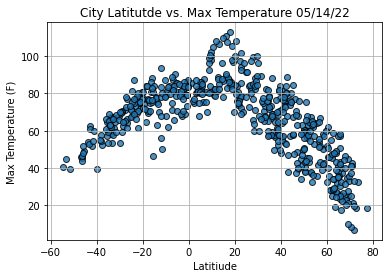

In [30]:
# import time module
import time

# build the scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_max_temp.png")

# show plot
plt.show()

## Latitude vs Humidity

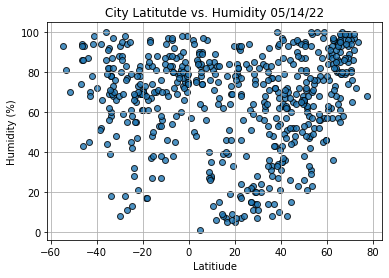

In [29]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           humidity,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_humidity.png")

# show plot
plt.show()

# Latitude vs Cloudiness

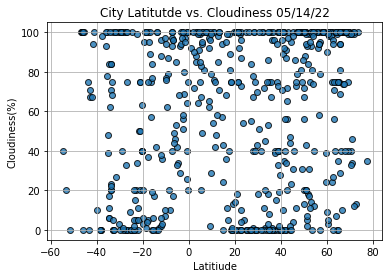

In [31]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           cloudiness,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_cloudiness.png")

# show plot
plt.show()

# Latitude vs Wind Speed

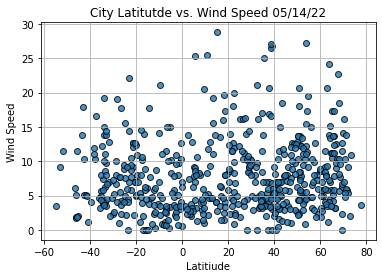

In [32]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           wind_speed,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_wind_speed.png")

# show plot
plt.show()